In [155]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout
from sklearn.model_selection import train_test_split

Import libraries

In [156]:
image_data = np.load('images_data.npy')
label_data = np.load('labels.npy')

Load image data from the numpy arrays

In [157]:
image_data = image_data.reshape(image_data.shape[0], 28, 28, 1)

Reshape the image data so that the colour channel is included in the arrays.
The images are in greyscale so therefore only one colour channel is used.

In [158]:
imageTrain, imageTest, labelsTrain, labelsTest = train_test_split(image_data, label_data, test_size=0.2)
labelsTrain = np.argmax(labelsTrain, axis=1)
labelsTest = np.argmax(labelsTest, axis=1)

Split data into training and testing sets

In [159]:
model = Sequential()

model.add(Conv2D(64, (3,3), 1, activation = 'relu', input_shape=(28,28,1))) #input shape is 28 by 28 as the provided iamges are 28 by 28 pixels
model.add(MaxPooling2D())

model.add(Conv2D(128, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

Model Building

In [160]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

Add optimiser parameter (using Adam optimsier)

In [161]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_45 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_45 (MaxPooli  (None, 13, 13, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_46 (Conv2D)          (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_46 (MaxPooli  (None, 5, 5, 128)         0         
 ng2D)                                                           
                                                                 
 conv2d_47 (Conv2D)          (None, 3, 3, 64)          73792     
                                                                 
 max_pooling2d_47 (MaxPooli  (None, 1, 1, 64)        

Summary of model that has been built

In [162]:
hist = model.fit(imageTrain, labelsTrain, epochs = 18, validation_data = (imageTest,labelsTest))

Epoch 1/18


25/25 [==============================] - 2s 16ms/step - loss: 1.7187 - accuracy: 0.5188 - val_loss: 0.6372 - val_accuracy: 0.6350
Epoch 2/18
25/25 [==============================] - 0s 12ms/step - loss: 0.5588 - accuracy: 0.7163 - val_loss: 0.5980 - val_accuracy: 0.7100
Epoch 3/18
25/25 [==============================] - 0s 10ms/step - loss: 0.5115 - accuracy: 0.7500 - val_loss: 0.5648 - val_accuracy: 0.6900
Epoch 4/18
25/25 [==============================] - 0s 10ms/step - loss: 0.4683 - accuracy: 0.7775 - val_loss: 0.5761 - val_accuracy: 0.7000
Epoch 5/18
25/25 [==============================] - 0s 10ms/step - loss: 0.5027 - accuracy: 0.7350 - val_loss: 0.6412 - val_accuracy: 0.7000
Epoch 6/18
25/25 [==============================] - 0s 11ms/step - loss: 0.4387 - accuracy: 0.7837 - val_loss: 0.5796 - val_accuracy: 0.7000
Epoch 7/18
25/25 [==============================] - 0s 11ms/step - loss: 0.3889 - accuracy: 0.8213 - val_loss: 0.5703 - val_accuracy: 0.7750
Epoch 8/18
25/25 [======

Fitting the model using the validation data

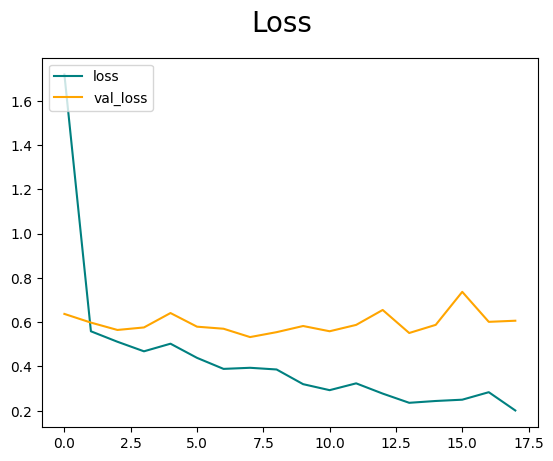

In [163]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle("Loss", fontsize = 20)
plt.legend(loc="upper left")
plt.show()

Plotting the loss function and validation loss of the model

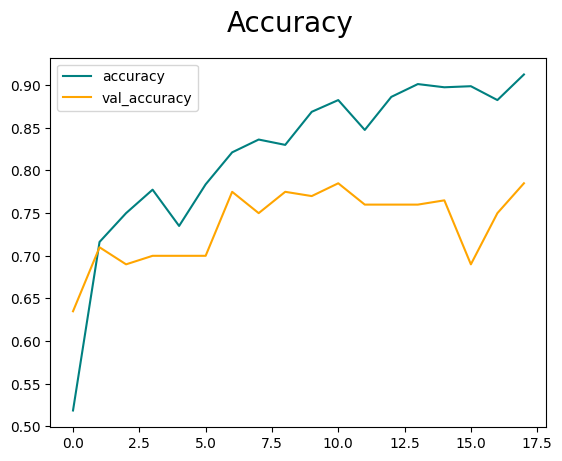

In [164]:
fig2 = plt.figure()
plt.plot(hist.history['accuracy'], color = 'teal', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color = 'orange', label = 'val_accuracy')
fig2.suptitle("Accuracy", fontsize = 20)
plt.legend(loc="upper left")
plt.show()

Plotting the accuracy and validation accuracy of the model